Step 1: reformat data output file 

Parsed data written to 'processed_file_H-H_rdf_NaFBLi.dat'.


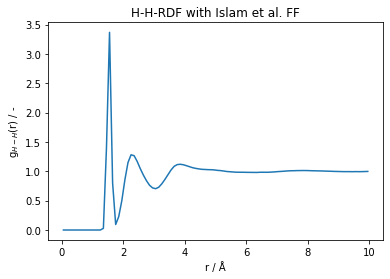

In [11]:
import matplotlib.pyplot as plt

def read_and_parse_file(input_filename, output_filename):
    try:
        with open(input_filename, 'r') as input_file:
            for _ in range(4):
                next(input_file)
            
            data_columns = []
            
            for line in input_file:
                columns = line.strip().split()
                data_columns.append(columns[1:3])
            
            with open(output_filename, 'w') as output_file:
                for columns in data_columns:
                    output_line = ' '.join(columns) + '\n'
                    output_file.write(output_line)
            
            print(f"Parsed data written to '{output_filename}'.")
    
    except FileNotFoundError:
        print(f"Input file '{input_filename}' not found.")
    except Exception as e:
        print("An error occurred:", e)

input_filename = 'H-H_rdf_NaFBLi.dat'
output_filename = 'processed_file_' + input_filename
read_and_parse_file(input_filename, output_filename)

    
def plot_data_from_file(file_path):
        x = []
        y = []

        with open(file_path, 'r') as file:
            for line in file:
                data = line.split()
                x.append(float(data[0]))
                y.append(float(data[1]))

        plt.plot(x, y)
        plt.xlabel('r / Å')
        plt.ylabel('g$_{H-H}$(r) / - ')
        plt.title('H-H-RDF with Islam et al. FF')
        plt.show()

file_path = output_filename
plot_data_from_file(file_path)

Step 2: plot with desired soper rdf data

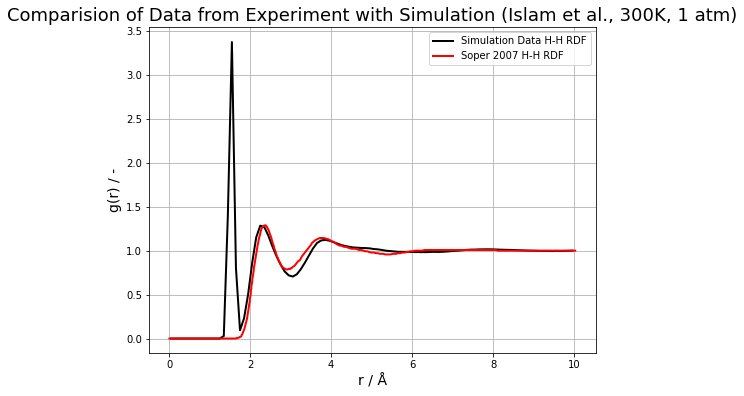

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt('processed_file_H-H_rdf_NaFBLi.dat')
data2 = np.loadtxt('soper_2007_H-H_shifted.dat')

plt.figure(figsize=(8, 6))

plt.plot(data1[:, 0], data1[:, 1], label='Simulation Data H-H RDF', color='black', linestyle='-', linewidth=2)

plt.plot(data2[:, 0], data2[:, 1], label='Soper 2007 H-H RDF', color='red', linestyle='-', linewidth=2)

plt.xlabel('r / Å', fontsize = 14)
plt.ylabel('g(r) / -', fontsize = 14)
plt.title('Comparision of Data from Experiment with Simulation (Islam et al., 300K, 1 atm)', fontsize = 18)
plt.legend()

plt.grid(True)
plt.show()